### **Question 1) Part of Speech tagging using unigram , Bigram , Trigram and combined all of these**

---




*  **Unigram**

In [20]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.accuracy(test_sents)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


0.8121200039868434

*  **Bigram**

In [21]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.accuracy(test_sents)

0.10206319146815508

*   **Trigram**

In [22]:
trigram_tagger =  nltk.TrigramTagger(train_sents)
trigram_tagger.accuracy(test_sents)

0.0626931127279976

*  **Combining Unigram bigram and Trigram**

In [23]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t3 = nltk.TrigramTagger(train_sents, backoff=t2)
t3.accuracy(test_sents)

0.843317053722715

### **Question 2)  Demonstration of Regular expression - based NP chunker**



---






In [3]:
pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 3.9 MB/s eta 0:00:00


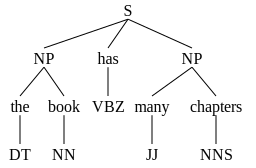

In [4]:
from nltk.chunk import RegexpParser
chunker = RegexpParser(r'''
NP:
{<DT><NN.*><.*>*<NN.*>}
}<VB.*>{
''')
 
chunker.parse([('the', 'DT'), ('book', 'NN'), (
    'has', 'VBZ'), ('many', 'JJ'), ('chapters', 'NNS')])

### **Question 3)  Designing a noun phrase chunker**



---






In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
from nltk import pos_tag
from nltk import RegexpParser
text ="I am Vaibhav and this is NLP  example".split()
print("After Split:",text)
tokens_tag = pos_tag(text)
print("After Token:",tokens_tag)
patterns= """mychunk:{<NN.?>}"""
chunker = RegexpParser(patterns)
print("After Regex:",chunker)
output = chunker.parse(tokens_tag)
print("Noun Chunker",output)

After Split: ['I', 'am', 'Vaibhav', 'and', 'this', 'is', 'NLP', 'example']
After Token: [('I', 'PRP'), ('am', 'VBP'), ('Vaibhav', 'NNP'), ('and', 'CC'), ('this', 'DT'), ('is', 'VBZ'), ('NLP', 'JJ'), ('example', 'NN')]
After Regex: chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<NN.?>'>
Noun Chunker (S
  I/PRP
  am/VBP
  (mychunk Vaibhav/NNP)
  and/CC
  this/DT
  is/VBZ
  NLP/JJ
  (mychunk example/NN))


### **Question 4)  Develop a simple context-Free grammar for parsing a English sentence using NLTK**



---







In [24]:
from nltk import CFG
grammar1 = CFG.fromstring("""
 S -> NP VP
 VP -> V NP | V NP PP
 PP -> P NP
 V -> "saw" | "ate" | "walked"
 NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
 Det -> "a" | "an" | "the" | "my"
 N -> "man" | "dog" | "cat" | "telescope" | "park"
 P -> "in" | "on" | "by" | "with"
 """)
sent = "Mary saw Bob".split()
parser = nltk.ChartParser(grammar1)
for tree in  parser.parse(sent):
  print(tree)

(S (NP Mary) (VP (V saw) (NP Bob)))


### **Question 5)  Design a program for searching for three-word phrases using POS tags**



---







In [5]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
def process(sentence):
 for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
  if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
    print(w1, w2, w3)
for tagged_sent in brown.tagged_sents()[:100]:
  process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


### **Question 6)  Create a tagger that tags everything as NN**



---







In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

### **Question 7)  Design a program to train a tagger by seperating the Training and Testing Data and after that calculate the model accuracy**



---







In [29]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [30]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])


[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [33]:
 unigram_tagger.accuracy(brown_tagged_sents)

0.9349006503968017

In [34]:
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.accuracy(test_sents)

0.8121200039868434